### 比賽網址:https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

### 實作方法參考網址:https://www.kaggle.com/code/smnuruzzaman/house-price-90

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

In [156]:
df = pd.read_csv('data/train.csv')

In [159]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## 踢掉空值過多的欄位避免影響預測(抓超過100的)

In [140]:
df_train = df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], axis=1)

## 這次的目標是要將各個欄位導入做線性回歸預測

我的看法是將所有的欄位都丟進去做預測，因為我不是看房大師，不知道那些要素對房價的影響是正向還是負向。<br>
所以我打算把所有欄位都拿去做預測，有相關性的資料就會影響到模型，沒有相關性的資料就應該會呈現常態分佈對模型的影響不大，我是這麼認為的。

C:\Users\user\AppData\Local\Temp\ipykernel_19776\1974361257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['MSSubClass'])


<Axes: xlabel='MSSubClass', ylabel='Density'>

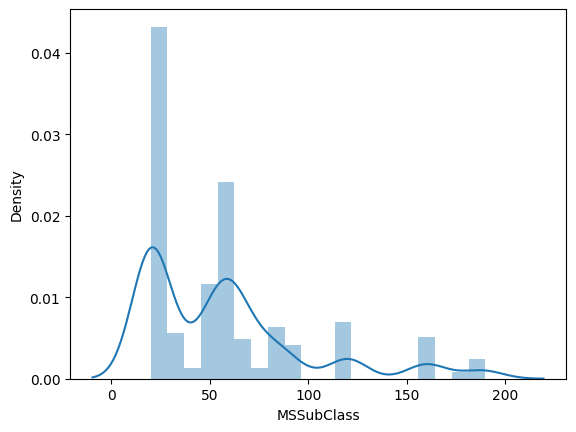

In [141]:
sns.distplot(df_train['MSSubClass'])

## 因為物件不好處理所以先分開做，選出數字欄位和物件欄位

In [144]:
df_only_num = df_train.select_dtypes(include=['int64','float64']).columns
#select 'Object' data type columns name
cat_var=df_train.select_dtypes(include=['O']).columns

## 用SimpleImputer將數字欄位用平均填上，物件欄位用出現最多次的填上

In [145]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(df_train[df_only_num])
imputer.fit_transform(df_train[df_only_num])
df_train[df_only_num]=imputer.transform(df_train[df_only_num])

In [146]:
cat_imputer=SimpleImputer(strategy='most_frequent')
df_train[cat_var]=cat_imputer.fit_transform(df_train[cat_var])

## lable encoding 將object欄位裡的內容以數字取代

In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for var in cat_var:
    df_train[var]=le.fit_transform(df_train[var])

## 分割資料，開始訓練模型

In [149]:
X = df_train.iloc[:,:-1]
y = df_train['SalePrice']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
model.score(X_test, y_test)

0.7142814356371976

## 根據網站的規則以RMSE來評分(越小越好)

In [153]:
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=False)

42983.75322346816

## 輸出模型

In [154]:
import joblib
joblib.dump(model, 'house_prices_predictio.pkl', compress = 3)

['house_prices_predictio.pkl']